# Optimal Coronavirus Tracker Distribution

**Optimization for large-scale data**

**Antonio Gañán Mora**

## Introduction

Coronavirus trackers have been proved to be one of the best methods for early detection and contention of the spread of the virus. The job of a tracker is quite simple: to contact with those people in close interaction with a coronavirus positive-tested person. It is widely known that Spain, and in particular Madrid, has had a notable lack of trained people for carrying this activity, and, therefore, military personnel and health workers have been used for tracking, alongside some private companies. Thus, the optimal distribution of the trackers of all companies in each region of a country is an important task. The goal of this project is to obtain that optimal distribution for Spain.

## a) Mathematical Modelling

In this section we will derive a mathematical definition of our problem as an optimization problem.

Let $x_{ij}$ be the number of employees from company $i \in C$ working for the government of the region $j \in R$, where $C$ and $ R $ represent the sets of companies and regions of the country, respectively. We want to find the $ x_{ij} $ such that the number of positive cases detected by all trackers is maximum. Each tracker will detect some average number of positives. We assume that this number does not depend on the company nor the region. Therefore, it is a global constant and we will not take it into account. We consider that the number of positives in a region detected by some company depend on three factors. 
- The number of detected positives will depend on the population of the region. The greater the population, the faster the virus can spread, and the greater the number of positives to be detected. 
- Also, the greater the accumulated incidence of a region, the more likely is to find infected people. As trackers are a tool for avoiding the spread in the early stages of the pandemic, we will favor those regions with a *middle* accumulated incidence. If the incidence is too large then for any reasonable amount of trackers they are simply not able to track all close contacts. 
- Finally, we will assume that each region manages its own healthcare system. That is, we suppose a not heavily centralized country in health affairs, like Spain. Therefore, for reasons of proximity, we will favor those companies who are working for the governments of their region. This allows for easier communication, for a better knowledge of local culture (crowded places, language...), avoid different timezones, etc. 

We denote $ w_{ij} $ as the weight that a given worker of company $ i $ works for the $ j $ region. $ w_{ij} $ can be expressed as the product of the three aforementioned factors,
\begin{equation}
    w_{ij} = \frac{\tilde{w}_{ij}}{\sum_j \tilde{w}_{ij}},
\end{equation}
where $ \tilde{w}_{ij} $ are unnormalized weights, which are a product of the three factors we have previously considered
\begin{equation}
    \tilde{w}_{ij} = \tilde{w}_{j}^{\text{inc}} \cdot \tilde{w}_{j}^{\text{pop}} \cdot \tilde{w}_{ij}^{\text{loc}}.
\end{equation}

- The first weight measures the importance of the incidence in region $ j $,
\begin{equation}
    \tilde{w}_{j}^{\text{inc}} = \left( \frac{\text{inc}_j}{\text{inc}_{\text{max}}/2} \right) \exp\left(- \frac{\text{inc}_j}{\text{inc}_{\text{max}}/2} \right).
\end{equation}
where $ \text{inc}_j $ is the cumulative 14-days incidence of region $ j $, and $ \text{inc}_{\text{max}} $ is some incidence for which $ \tilde{w}_{j}^{\text{inc}} $ is maximum. The election of a particular shape for $ \tilde{w}_{j}^{\text{inc}} $ has been guided by the desire of $ \tilde{w}_{j}^{\text{inc}} $ to have lower values for small and large values of $ \text{inc}_j $.
- The second weight measures the population of the region $ j $,
\begin{equation}
    \tilde{w}_{j}^{\text{pop}} = \frac{\text{population}_j}{\mu_{\text{pop}}},
\end{equation}
where $ \mu_{\text{pop}} $ is the mean population of the regions of the country. The fact that we divided by $ \mu_{\text{pop}} $ guarantees that $ \tilde{w}_{j}^{\text{pop}} $ is of order of unity (except for very large or very small regions), therefore it works as a modulator for $ \tilde{w}_{j}^{\text{inc}} $. Observed that we assumed linearity on population dependence.
- The last weight measures the proximity of the company $ i $ to the region $ j $,
\begin{equation}
    \tilde{w}_{ij}^{\text{loc}} = 1 + \delta_{ij},
\end{equation}
where $ \delta_{ij} $ is a Kronecker delta with value 1 if the location of $ i $ is the region $ j $, and 0 if not. Notice that, again, this weight is of the order of the unity, and it doubles the unweighted probability of a government choosing a company with which it shares the same region. 

The objective function can be formulated as
\begin{equation}
    z = \sum_{ij} w_{ij} x_{ij} = \frac{ \tilde{w}_{j}^{\text{inc}} \cdot \tilde{w}_{j}^{\text{pop}} \cdot \tilde{w}_{ij}^{\text{loc}} }{\sum_j \tilde{w}_{ij}} x_{ij}.
\end{equation}

Having introduced the objective function, let us define the constraints:
- Each region must have a minimum number of trackers. This number depends on the recommended number of trackers per people by authorities and on the population of the region. International health organizations recommend a tracker for every 5500 people (https://www.lasexta.com/noticias/nacional/madrid-y-navarra-a-la-cola-en-numero-de-rastreadores-por-cantidad-de-habitantes_202008125f34061b2676530001701eca.html),
\begin{equation}
    \sum_i x_{ij} \geq x_j^{\text{min}} = f \frac{1}{5500} \cdot \text{population}_j,
\end{equation}
where $ 0 \leq f \leq 1 $ is some constant. The constant $f$ reflects the fact that regions will probably have a lower fraction of trackers than recommended due to shortage of trackers and unwillingness to expend money, but at least they should have a significant number of trackers compared to authorities guidelines.
- Each company has some number of employees, and the sum of employees in each region must not exceed it,
\begin{equation}
    \sum_j x_{ij} \leq \text{trackers}_i.
\end{equation}
- Each region devotes some funds to pay the trackers. The amount of expenses for each region cannot be higher than its budget. Every company must pay a salary to each tracker --- though cases has been observed where it has been expected for trackers to work for free. We assume that the salary is a constant for each tracker in a given company. The amount of money spent must satisfy
\begin{equation}
    \sum_{i} \text{salary}_i x_{ij} \leq \text{budget}_j.
\end{equation}

All the ingredients for the minimization problem are introduced. We can summarize them as follows:
\begin{equation}
    \begin{split}
        \max_{x} &\sum_{ij} w_{ij} x_{ij} \\
        s.t. \quad & \sum_i x_{ij} \geq x_j^{\text{min}} = f \frac{1}{5500} \cdot \text{population}_j \\
        & \sum_j x_{ij} \leq \text{trackers}_i \\
        & \sum_{i} \text{salary}_i x_{ij} \leq \text{budget}_j
    \end{split}
\end{equation}

Notice that $ x_{ij} $ has not been assumed to be an integer number of workers. This might be understood by the fact that trackers can be hired for some number of hours per day, or that they can work for several regions in the same company some amount of time of their total workday resulting in $ x_{ij} $ being non-integer. Nevertheless, the continuum assumption for $ x_{ij} $ has its limitations because in practice it is not posible for workers to follow schedules with, say, 8 decimal precision. The main point is that non-integrity for $ x_{ij} $ can be readily interpreted and applied within some precision.

## b) Solution of the Model with Pyomo

We will proceed to solve the previous model with Pyomo. First we generate more or less realistic, random data. Then we save it in a `.dat` file. Lastly we solve the model.

### Data Generation

The chosen country has been Spain. The regions ---autonomous communities--- and their population has been extracted from the INE (https://www.ine.es/jaxiT3/Datos.htm?t=2853#!tabs-tabla). We have not considered Ceuta and Melilla for simplicity and because of their lower population.

An average salary of 1000 euros has been used to uniformly sample salary values around it within a $\pm 250$ interval. The number of companies has been chosen to be $20$. The number of trackers in a company is uniformly sampled in the interval $(0.5 \cdot \text{trackers_mean}, 1.5 \cdot \text{trackers_mean})$, where $\text{trackers_mean}$ is the average number of trackers for each company. $\text{trackers_mean}$ has been chosen so that the sum of the number of trackers in all the country is approximately the recommended number by authorities,
\begin{equation}
    \text{trackers_mean} = \text{int}\left( \frac{\text{total_pop} \cdot \text{fraction_trackers}}{\text{n_companies}} \right),
\end{equation}
where int is the integer part. The incidence for each region is uniformly sampled on the interval $(25, 500)$. The constant $f$ of the previous section has been chosen to be $1/3$. The incidence for which $\tilde{w}_j^{\text{inc}}$ is maximum has been set to $100$.

More details of the data generation can be seen in the code.

In [1]:
# Load required packages for all the assignment.
import pyomo.environ as pyo
import pandas as pd
import numpy as np
import time
import copy
import matplotlib.pyplot as plt

In [2]:
# Spanish communities (regions) and their population
# https://www.ine.es/jaxiT3/Datos.htm?t=2853#!tabs-tabla
regions_dict = {'Andalucia': 8414240, 'Aragon': 1319291, 'Asturias': 1022800, 'Baleares': 1149460, 
                'Canarias': 2153389, 'Cantabria': 581078, 'CastillaLeon': 2399548, 'CastillaLaMancha': 2032863, 
                'Catalunya': 7675217, 'Valencia': 5003769, 'Extremadura': 1067710, 'Galicia': 2699499, 
                'Madrid': 6663394, 'Murcia': 1493898, 'Navarra': 654214, 'PaisVasco': 2207776, 'Rioja': 316798}
region_names = list(regions_dict.keys())
region_pop = list(regions_dict.values())

# Non-pyomo parameters.
regions = {"regions_dict": regions_dict, 
          "region_names": region_names, 
          "region_pop": region_pop,
          "n_regions": len(region_names),
          "total_pop": sum(region_pop),
          "mean_pop": np.mean(region_pop),
          "region_weights": [val/sum(region_pop) for val in region_pop]}
params = {}
params["fraction_trackers"] = 1/5500
params["min_fraction_trackers"] = 1/3
params["inc_max"] = 100
params["salary_mean"] = 1000
params["salary_lims"] = (params["salary_mean"]-250, 
                         params["salary_mean"]+250)
params["n_companies"] = 20
params["trackers_mean"] = int(regions["total_pop"]*
                              params["fraction_trackers"]/
                              params["n_companies"])
params["trackers_lims"] = (int(0.5*params["trackers_mean"]), 
                           int(1.5*params["trackers_mean"]))
params["incidence_lims"] = (25, 500)

# Set seed.
np.random.seed(1234)

Data generation has been separated into three functions using the previously define `regions` and `params` dictionaries. 
- `get_regions_df` generates data related with regions.
- `get_regions_df` generates data related with companies.
- `get_weights_df` generates random weights. It first generates unnormalized weights, and then normalize them. Unnormalized weights calls to `virus_weight`, `pop_weight`, and `loc_weight`.

In [3]:
# Functions for data generation.

# Data for regions.
def get_regions_df(regions_df, regions, params):
    # Modify regions_df empty df with data generated from regions and params.
    # Input:
    # - regions_df: empty df to update. Its columns are: "name", "population", 
    #   "min_trackers", "budget", and "incidence".
    # - regions: dictionary with regions-related parameters. Its keys are:
    #   "regions_dict": regions_dict, "region_names", "region_pop", "n_regions", 
    #   "total_pop", "mean_pop", and "region_weights".
    # - params: dictionary with data generation parameters. Its keys are:
    #   'fraction_trackers', 'min_fraction_trackers', 'inc_max', and 'salary_mean', 
    #   'salary_lims', 'n_companies', 'trackers_mean', 'trackers_lims', 
    #   and 'incidence_lims'.
    
    # Unpack some values.
    fraction_trackers = params["fraction_trackers"]
    min_fraction_trackers = params["min_fraction_trackers"]
    salary_lims = params["salary_lims"]
    incidence_lims = params["incidence_lims"]
    regions_dict = regions["regions_dict"]
    # Generate data for each region.
    for name in regions_dict.keys():
        population = regions_dict[name]
        min_trackers = int(min_fraction_trackers*fraction_trackers*population)
        budget = int(fraction_trackers*population*
                     np.random.uniform(salary_lims[0], salary_lims[1]))
        incidence = np.random.uniform(incidence_lims[0], incidence_lims[1])
        regions_df.loc[name] = [name, population, min_trackers, budget, incidence]

# Data for companies
def get_companies_df(companies_df, regions, params):
    # Modify companies_df empty df with data generated from regions and params.
    # Input:
    # - companies_df: empty df to update. Its columns are: "ID", "region"
    #   "n_trackers", "salary", and "max_group". 
    #   Its rows are: list(range(params["n_companies"]) .
    # - regions: same as in get_regions_df.
    # - params: same as in get_regions_df.
    
    # Unpack some values.
    n_companies = params["n_companies"]
    salary_lims = params["salary_lims"]
    trackers_lims = params["trackers_lims"]
    region_names = regions["region_names"]
    total_pop = regions["total_pop"]
    mean_pop = regions["mean_pop"]
    region_weights = regions["region_weights"]
    # Generate data for each company.
    for ID in range(n_companies):
        region = np.random.choice(region_names, p = region_weights)
        n_trackers = int(np.random.uniform(trackers_lims[0], trackers_lims[1]))
        salary = int(np.random.uniform(salary_lims[0], salary_lims[1])) 
        max_group = int(0.85*n_trackers) # max_group will be used in section d).
        companies_df.loc[ID] = [ID, region, n_trackers, salary, max_group]

# Data for weights.

def virus_weight(inc, inc_max):
    # Get \tilde{w}_{j}^{\text{inc}}.
    half_peak = inc_max/2
    return (inc/half_peak)**2*np.exp(-inc/half_peak)

def pop_weight(population, mean_pop):
    # Get \tilde{w}_{j}^{\text{pop}} 
    return population/mean_pop

def loc_weight(loc_comp, loc_region):
    # Get \tilde{w}_{ij}^{\text{loc}} 
    return 1 + float(loc_comp == loc_region)

def unnorm_weight(inc, inc_max, population, loc_comp, loc_region, mean_pop):
    # Get \tilde{w}_{ij}
    vw = virus_weight(inc, inc_max)
    pw = pop_weight(population, mean_pop)
    lw = loc_weight(loc_comp, loc_region)
    return vw*pw*lw

def normalize_weights(weights_df, n_companies):
    # Normalize \tilde{w}_{ij}.
    for i in range(n_companies):
        weights_df.loc[i] /= weights_df.loc[i].sum()
        
def get_weights_df(weights_df, regions_df, companies_df, regions, params):
    # Get weights w_{ij}.
    # Input: 
    # - weights_df: empty df to update.
    #   Its columns are: regions_df["region_names"]
    #   Its rows are: companies_df["ID"].
    # - regions_df, companies_df, regions, params: same as before.
    
    # Unpack some values.
    n_companies = params["n_companies"]
    inc_max = params["inc_max"]
    mean_pop = regions["mean_pop"]
    # Generate data.
    for i in range(n_companies):
        loc_comp = companies_df.loc[i]["region"]
        weight_comp = []
        for loc_region in regions_df.name:
            inc = regions_df.loc[loc_region]["incidence"]
            population = regions_df.loc[loc_region]["population"]
            uw = unnorm_weight(inc, inc_max, population, loc_comp, loc_region, mean_pop)
            weight_comp.append(uw)
        weights_df.loc[i] = weight_comp
    normalize_weights(weights_df, n_companies)

def get_random_data(regions, params, regions_df, companies_df, weights_df):
    # Get random data for regions, companies and weights.
    # Input: see each function call.
    get_regions_df(regions_df, regions, params)
    get_companies_df(companies_df, regions, params)
    get_weights_df(weights_df, regions_df, companies_df, regions, params)

In [4]:
# Store regions data in region_df
regions_cols = ["name", "population", "min_trackers", "budget", "incidence"]
regions_df = pd.DataFrame(columns = regions_cols, index = region_names)
# Store companies data in companies_df
companies_cols = ["ID", "region", "n_trackers", "salary", "max_group"]
companies_df = pd.DataFrame(columns = companies_cols)
# Store weight data in weight_df
weights_df = pd.DataFrame(columns = region_names, 
                          index = list(range(params["n_companies"])))
# Get data.
get_random_data(regions, params, regions_df, companies_df, weights_df)

### File Generation

Creation of required sets and parameters for solving the model with Pyomo. See next section to know the required sets and parameters. Firs, we define the `create_file` function to generate generate a file from dfs. Then we call this function with the previously defined dfs. Note that `max_group` is not used in this section, but in section d).

In [5]:
def create_file(filename, regions_df, companies_df, weights_df):
    # Create a .dat file with the required sets and parameters to 
    # solve the model.
    # Input:
    # - filename: string with the name of the file. Must end 
    #   in .dat .
    # - regions_df, companies_df, weights_df: see functions before.

    file = open(filename, "w")

    # Write sets.
    file_str = "\nset C := "
    for i in companies_df.ID:
        curr_str = str(i) + " "
        file_str += curr_str
    file_str += ";"
    file.write(file_str)

    file_str = "\n\nset R := "
    for name in regions_df.name:
        curr_str = name + " "
        file_str += curr_str
    file_str += ";"
    file.write(file_str)

    # Write weights in file.
    file_str = "\n\nparam w : "
    for name in regions_df.name:
        curr_str = name + " "
        file_str += curr_str
    file_str += ":= \n"

    for i in companies_df.ID:
        file_str += str(i) + " "
        for name in regions_df.name:
            curr_weight_str = str(weights_df.loc[i][name])
            file_str += curr_weight_str + " "
        file_str += "\n"
    file_str += ";"
    file.write(file_str)

    # Write min_trackers in file.
    file_str = "\n\nparam min_trckrs := \n"
    for name in regions_df.name:
        curr_str = name + " " + str(regions_df.loc[name]["min_trackers"]) + "\n"
        file_str += curr_str
    file_str += ";"
    file.write(file_str)

    # Write budgets in file.
    file_str = "\n\nparam budgets := \n"
    for name in regions_df.name:
        curr_str = name + " " + str(regions_df.loc[name]["budget"]) + "\n"
        file_str += curr_str
    file_str += ";"
    file.write(file_str)

    # Write n_trckrs in file.
    file_str = "\n\nparam n_trckrs := \n"
    for i in companies_df.ID:
        curr_str = str(i) + " " + str(companies_df.loc[i]["n_trackers"]) + "\n"
        file_str += curr_str
    file_str += ";"
    file.write(file_str)

    # Write salary in file.
    file_str = "\n\nparam salary := \n"
    for i in companies_df.ID:
        curr_str = str(i) + " " + str(companies_df.loc[i]["salary"]) + "\n"
        file_str += curr_str
    file_str += ";"
    file.write(file_str)

    # Write max_group in file.
    file_str = "\n\nparam max_group := \n"
    for i in companies_df.ID:
        curr_str = str(i) + " " + str(companies_df.loc[i]["max_group"]) + "\n"
        file_str += curr_str
    file_str += ";"
    file.write(file_str)

    file.close()

In [6]:
# Get file with data for the model.
create_file("trackers_data.dat", regions_df, companies_df, weights_df)

### Model Creation and Solution

We solve the mathematical model using Pyomo scripting in Python. First, we define the `AbstractModel` with its sets, parameters, constraints, variables, and objective function. Next, we solve the model with the user-defined `solve_model` function.

Observe that we have $n_{\text{companies}} \times n_{\text{regions}} = 20 \cdot 17 = 340$ variables, one for each $x_{i,j}$, and $ n_{\text{min_trckrs_constr}} + n_{\text{budgets_constr}} + n_{\text{n_trckrs_constr}} = 2n_{\text{regions}} + n_{\text{companies}} = 2\cdot 17 + 20 = 54 $ constraints.

In [7]:
model = pyo.AbstractModel()

# Define Sets.
model.C = pyo.Set()
model.R = pyo.Set()

# Define parameters.
model.w = pyo.Param(model.C, model.R)
model.min_trckrs = pyo.Param(model.R)
model.budgets = pyo.Param(model.R)
model.n_trckrs = pyo.Param(model.C)
model.salary = pyo.Param(model.C)

# Define parameters for binary analysis.
model.min_group = pyo.Param(model.C)
model.max_group = pyo.Param(model.C)

# Define variables.
model.x = pyo.Var(model.C, model.R, domain = pyo.NonNegativeReals)

# Objective function.
def obj_expr(m):
    return pyo.summation(m.w, m.x)

model.OBJ = pyo.Objective(rule = obj_expr, sense = pyo.maximize)

# Define constraints.
def min_trckrs_constr(m, j):
    return sum(m.x[i,j] for i in m.C) >= m.min_trckrs[j]

def budgets_constr(m, j):
    return sum(m.x[i,j]*m.salary[i] for i in m.C) <= m.budgets[j]

def n_trckrs_constr(m, i):
    return sum(m.x[i,j] for j in m.R) <= m.n_trckrs[i]

model.min_trckrs_constr = pyo.Constraint(model.R, rule = min_trckrs_constr)
model.budgets_constr = pyo.Constraint(model.R, rule = budgets_constr)
model.n_trckrs_constr = pyo.Constraint(model.C, rule = n_trckrs_constr)

In [8]:
# Define function to solve the model and print results.
def solve_model(model, filename, region_names, companies_ID, verbose = True):
    instance = model.create_instance(data = filename)
    instance.dual = pyo.Suffix(direction = pyo.Suffix.IMPORT)
    opt = pyo.SolverFactory("glpk")
    results = opt.solve(instance)

    # Print obj function and non-zero variables.
    if verbose:
        print("Objective function: ", instance.OBJ())
    for var in instance.component_objects(pyo.Var, active=True):
        if verbose:
            print("Variable", var)
        varobject = getattr(instance, str(var))
        for index in varobject:
            val = varobject[index].value
            if val and verbose:
                print("   ", index, val)
    return instance

In [9]:
# Solve the model.
companies_ID = companies_df["ID"]
instance = solve_model(model, "trackers_data.dat", region_names, companies_ID)

Objective function:  1323.9287633349668
Variable x
    (0, 'Galicia') 450.072176949942
    (0, 'Madrid') 60.927823050058
    (1, 'CastillaLeon') 102.65512096182
    (1, 'Extremadura') 150.343853820598
    (1, 'Murcia') 146.001025217582
    (2, 'Andalucia') 290.0
    (3, 'Valencia') 464.0
    (4, 'Andalucia') 450.0
    (5, 'Catalunya') 259.0
    (6, 'Catalunya') 214.0
    (7, 'Valencia') 394.571616662896
    (7, 'Murcia') 65.7076770770718
    (7, 'Navarra') 86.7207062600321
    (8, 'Madrid') 254.363228699551
    (8, 'PaisVasco') 293.636771300448
    (9, 'Madrid') 415.0
    (10, 'CastillaLaMancha') 234.0
    (11, 'PaisVasco') 264.0
    (12, 'Baleares') 4.14595496246845
    (12, 'CastillaLeon') 358.076380062912
    (12, 'CastillaLaMancha') 31.4670050761422
    (12, 'Rioja') 67.3106598984768
    (13, 'Andalucia') 35.1459549624685
    (13, 'Aragon') 79.0
    (13, 'Baleares') 64.8540450375315
    (13, 'Canarias') 130.0
    (14, 'Catalunya') 439.0
    (15, 'Cantabria') 92.9346590909091
    (1

Several comments can be done regarding the results, $x_{ij}$:
- $x_{ij}$ order of magnitude ranges from $10^0$ to $10^2$.
- Each region usually contract services from a couple of companies, but in some cases it is optimum to engage with a single company, like with Galicia.
- Each company usually works for several regions, but in some cases it is optimum to serve to one region, like company 9. 
- There are some integer results. They usually appear for companies serving to a single region, but not always (see company 13).

## c) Sensitivities Computation

Given a perturbation in one of the parameters of the model, $\Delta b_j$, that defines a constraint the sensitivity measures the first order variation of the objective function, $\Delta z$. The senstivity is defined as 
\begin{equation}
    \lambda_j = \frac{\Delta z}{\Delta b_j}.
\end{equation}
As our objective function must be maximized, then any positive sensitivity is beneficial for our problem because the weighted number of positives detected increases.

In [10]:
# Compute sensitivities

## Store sensitivities (optional).
# l_min_trckrs = []
# l_budgets = []
# l_n_trckrs = []

print ("Duals")
i = 0
for c in instance.component_objects(pyo.Constraint, active=True):
    print ("   Constraint",c)
    for index in c:
        l = instance.dual[c[index]]
        print ("      ", index, l)
        ## Store sensitivities (optional).
        # if i == 0:
        #     l_min_trckrs.append(l)
        # elif i == 1:
        #     l_budgets.append(l)
        # else:
        #     l_n_trckrs.append(l)
    i += 1

Duals
   Constraint min_trckrs_constr
       Andalucia 0.0
       Aragon -0.0046879741310038
       Asturias 0.0
       Baleares -0.00584786516218498
       Canarias -0.00547108695908515
       Cantabria 0.0
       CastillaLeon 0.0
       CastillaLaMancha 0.0
       Catalunya 0.0
       Valencia 0.0
       Extremadura 0.0
       Galicia 0.0
       Madrid 0.0
       Murcia 0.0
       Navarra 0.0
       PaisVasco 0.0
       Rioja 0.0
   Constraint budgets_constr
       Andalucia 0.000159032533477375
       Aragon 0.0
       Asturias 7.20380779289744e-05
       Baleares 0.0
       Canarias 0.0
       Cantabria 1.76015750214764e-05
       CastillaLeon 5.37257850589179e-06
       CastillaLaMancha 2.51109087501542e-05
       Catalunya 0.000349160979393749
       Valencia 0.0
       Extremadura 3.2953950251206e-06
       Galicia 0.000293462280626946
       Madrid 5.48724438642956e-05
       Murcia 1.53157558035575e-06
       Navarra 1.22293962696272e-06
       PaisVasco 0.000164706816030808
 

Let us analyze the previous results. Before that, recall that the objective function does not exctly correspond to the total number of positives detected, but rather a mixture of that and the efficiency of the trackers. Both of those effects are captured in the weights. We proceed with the analysis of each type of constraint.
- For the minimum trackers constraint it can be seen that sensitivities are either zero or negative. For the zero values, a variation on the minimum number of trackers does not affect the detection of positives. For the negative ones, an increase of the minimum number of trackers decrease the efficiency of detection of positive cases. 
    - Note that for the minimum tracker sensitivities the minimum number of trackers in a certain region are increased, but the total number of trackers remains unchanged. Therefore, it might be the case that transferring trackers from one community to another decreases the number of cases detected or the efficiency of the trackers.
    - Observe that the objective function is of the order of thousands, $10^3$, but the sensitivities are of the order or $10^{-2}$ or $10^{-3}$. Thus, the perturbation is fairly small.
- For the budget constraint it can be observed that sensitivities are either zero or positive values of order $10^{-6}$ to $10^{-4}$. Recall that salaries are of the order of $10^3$. Realistic variations on the budget are of this order of magnitude. Therefore, the total variation for hiring one more tracker is on the order of $10^{-3}$ to $10^{-1}$, much more greater than what sensitivities might imply. Thus, an increase on budget either does not affect or affects positively.
- For the number of trackers on each company, it can seen that for all companies the sensitivities are positive and of the order of $10^{-1}$ or $10^{-2}$. This sensitivities are comparable to non-zero variations of the budget constraint.

From the previous analysis it can be concluded that training more trackers and increasing the budget to hire them affects positively to the effective detection of positives. Nevertheless, as sensitivities are of several orders of magnitude lower than the value of the objective function, this task should be performed on a great scale to produce noticeable improvements on the objective function.

## d) Binary Model

For a company it might not be efficient to split their trackers into small groups. To work for the government of a certain region, the company needs access to the health system databases of that region, setting up their network of computers and phones, and having meetings for the coordination of the tracking with authorities. Creating a group in a company that works for a region requires devoting time and money that is not directly used to track people. This initial time and money expenses cause that for a small group these *wasted* resources per unit tracker are high. Furthermore, as incidence suffers from great variability, it is possible to find that in order to achieve optimality it is required to eliminate some small groups (because of improvement of incidence, or worsening in other regions) and transfer the workers into other groups where their work is required. This probability of discarding small groups from time to time means that initial *wasted* resources constitute a large part of the total expenses of that group. Therefore it is not worth to have very small groups. Similarly, it is not worth to have very large groups of trackers in a company working for a single region. If there are large groups, then, if exists, the rest of the groups must be small, thus suffering from the problems exposed before; if they do not exist, then it might be the case that in a given time, due to variations in incidence, a new small group must be created. All in all, it is desirable to divide the workers of a given company in groups of medium size to save time and money.

Fixing every $x_{ij}$ between some extreme values $(L_i, U_i)$ is a trivial constraint,
\begin{equation}
    L_i \leq x_{ij} \leq U_i, \quad L_i > 0, \quad U_i > L_i
\end{equation}
Notice that, by the previous constraint, we are forcing every company to work for every region, because $x_{ij} \leq L_i$ cannot be zero. Dividing the tracking between a large number of companies is not optimal from the organizational perspective, and also encourages the creation of smaller groups. Therefore, we prefer the following constraint
\begin{equation}
    x_{ij} = 0 \quad \text{or} \quad L_j \leq x_{ij} \leq U_j.
\end{equation}
This logical constraint needs the introduction of a binary variable $y_{ij}$ such that
\begin{equation}
    y_{ij} = \begin{cases} 1, &\text{ if } L_j \leq x_{ij} \leq U_j, \\
    0, &\text{ if } x_{ij} = 0.
    \end{cases}
\end{equation}
Then the original logical constraint is equivalent to
\begin{equation}
    L_j y_{ij} \leq x_{ij} \leq U_j y_{ij},
\end{equation}
as can be seen upon substitution of the four possible cases. To generate $L_i$ we have used a common minimum number of trackers in a region for all companies, $ L_i = L = \text{min_num} = 10 $. The value of $U_i$ is the 85\% of the number of trackers in the company. 

By imposing the constraint $L_j y_{ij} \leq x_{ij} \leq U_j y_{ij}$ we intuitively expect that the number of companies working for a certain region increases, as noted before. This side effect is not desired. Therefore, one extra constraint can impose a limit on the number of companies per region,
\begin{equation}
    \sum_i y_{ij} \leq 3,
\end{equation}
where we have set 3 as the maximum number because it is a reasonable number. Notice that $y_{ij}$ acts like a counter: if $x_{ij}$ is zero, then $y_{ij}$ is zero; if $x_{ij}$ is positive, then $y_{ij}$ *gets activated* and its value equals to one.

To solve the model with the binary variable, a function to generate models with the same template is created. This function will later be used iteratively. Next, this function, `get_modelB`, is called and the model generated is solved.

In [11]:
def get_modelB(modelB):
    # Define Sets.
    modelB.C = pyo.Set()
    modelB.R = pyo.Set()

    # Define parameters.
    modelB.w = pyo.Param(modelB.C, modelB.R)
    modelB.min_trckrs = pyo.Param(modelB.R)
    modelB.budgets = pyo.Param(modelB.R)
    modelB.n_trckrs = pyo.Param(modelB.C)
    modelB.salary = pyo.Param(modelB.C)
    # Define parameters for binary analysis.
    modelB.max_group = pyo.Param(modelB.C)

    # Define variables.
    modelB.x = pyo.Var(modelB.C, modelB.R, domain=pyo.NonNegativeReals)
    # Define binary variables.
    modelB.y = pyo.Var(modelB.C, modelB.R, domain=pyo.Binary)

    # Objective function.
    def obj_expr(m):
        return pyo.summation(m.w, m.x)

    modelB.OBJ = pyo.Objective(rule = obj_expr, sense = pyo.maximize)

    # Define constraints.
    def min_trckrs_constr(m, j):
        return sum(m.x[i,j] for i in m.C) >= m.min_trckrs[j]

    def budgets_constr(m, j):
        return sum(m.x[i,j]*m.salary[i] for i in m.C) <= m.budgets[j]

    def n_trckrs_constr(m, i):
        return sum(m.x[i,j] for j in m.R) <= m.n_trckrs[i]

    modelB.min_trckrs_constr = pyo.Constraint(modelB.R, rule = min_trckrs_constr)
    modelB.budgets_constr = pyo.Constraint(modelB.R, rule = budgets_constr)
    modelB.n_trckrs_constr = pyo.Constraint(modelB.C, rule = n_trckrs_constr)

    # Define binary constraints.
    min_num = 10
    def x_disc_const(m, i, j):
        return m.max_group[i]*m.y[i,j] >= m.x[i,j]
    def x_disc_const2(m, i, j):
        return m.x[i,j] >= min_num*m.y[i,j]
    def max_comp_const(m, j):
        return sum(m.y[i,j] for i in m.C) <= 3

    modelB.x_disc_const = pyo.Constraint(modelB.C, modelB.R, rule = x_disc_const)
    modelB.x_disc_const2 = pyo.Constraint(modelB.C, modelB.R, rule = x_disc_const2)
    modelB.max_comp_const = pyo.Constraint(modelB.R, rule = max_comp_const)

In [12]:
modelB = pyo.AbstractModel()
get_modelB(modelB)

In [13]:
region_names = regions["region_names"]
companies_ID = companies_df["ID"]
instanceB = solve_model(modelB, "trackers_data.dat", region_names, companies_ID)

Objective function:  1103.868585689553
Variable x
    (0, 'Extremadura') 55.5785797438882
    (0, 'Galicia') 434.0
    (0, 'Rioja') 21.4214202561118
    (1, 'Madrid') 339.0
    (1, 'Murcia') 60.0
    (2, 'Asturias') 141.106080206986
    (2, 'CastillaLaMancha') 148.893919793014
    (3, 'Valencia') 394.0
    (3, 'Extremadura') 70.0
    (4, 'Andalucia') 382.0
    (4, 'Extremadura') 68.0
    (5, 'Aragon') 78.679012345679
    (5, 'Canarias') 180.320987654321
    (6, 'Baleares') 50.5401015228427
    (6, 'Canarias') 163.459898477157
    (7, 'Catalunya') 464.0
    (7, 'Murcia') 83.0
    (8, 'CastillaLeon') 158.636771300448
    (8, 'CastillaLaMancha') 42.0269058295964
    (8, 'PaisVasco') 329.914798206278
    (8, 'Rioja') 17.4215246636771
    (9, 'Asturias') 63.0
    (9, 'Valencia') 352.0
    (10, 'CastillaLaMancha') 198.0
    (10, 'Navarra') 36.0
    (11, 'PaisVasco') 224.0
    (11, 'Rioja') 40.0
    (12, 'Baleares') 18.4598984771573
    (12, 'Galicia') 14.0162436548223
    (12, 'Madrid') 391.

Observe that the smallest group, `(8, 'Rioja')`, has 17.42 trackers, which is a 4-times increase with respect the previous lowest group of the non-binary model, `(12, 'Baleares')` with 4.14. Notice that, by imposing further constraints, the value of the objective function decreases. While it is true that this distributions of trackers detect less efficiently positives, the optimal distribution of trackers is a problem which should be solved periodically (for instance, each week). The constraints associated with the binary variable favor this long run framework by avoiding small groups. 

## e) Binary Model: Continuum Limit

As our binary variable is a result of enfocing a logical constraint the continuum limit can hardly be interpreted: a logical constraint is either true or false, it cannot admit intermediate values. Notice that the non-interpretability of the continuum limit need not to happen in all integer optimization problems, because some continuum limits can be understood and their results interpreted.

For our binary variables a natural continuum limit might be to allow its value to take all real numbers between zero and one. We implement the same model as before, but with that particular change.

In [14]:
modelBMod = pyo.AbstractModel()

# Define Sets.
modelBMod.C = pyo.Set()
modelBMod.R = pyo.Set()

# Define parameters.
modelBMod.w = pyo.Param(modelBMod.C, modelBMod.R)
modelBMod.min_trckrs = pyo.Param(modelBMod.R)
modelBMod.budgets = pyo.Param(modelBMod.R)
modelBMod.n_trckrs = pyo.Param(modelBMod.C)
modelBMod.salary = pyo.Param(modelBMod.C)
# Define parameters for binary analysis.
modelBMod.max_group = pyo.Param(modelBMod.C)

# Define variables.
modelBMod.x = pyo.Var(modelBMod.C, modelBMod.R, domain=pyo.NonNegativeReals)
# Define binary variables.
modelBMod.y = pyo.Var(modelBMod.C, modelBMod.R, bounds = (0, 1))

# Objective function.
def obj_expr(m):
    return pyo.summation(m.w, m.x)

modelBMod.OBJ = pyo.Objective(rule = obj_expr, sense = pyo.maximize)

# Define constraints.
def min_trckrs_constr(m, j):
    return sum(m.x[i,j] for i in m.C) >= m.min_trckrs[j]

def budgets_constr(m, j):
    return sum(m.x[i,j]*m.salary[i] for i in m.C) <= m.budgets[j]

def n_trckrs_constr(m, i):
    return sum(m.x[i,j] for j in m.R) <= m.n_trckrs[i]

modelBMod.min_trckrs_constr = pyo.Constraint(modelBMod.R, rule = min_trckrs_constr)
modelBMod.budgets_constr = pyo.Constraint(modelBMod.R, rule = budgets_constr)
modelBMod.n_trckrs_constr = pyo.Constraint(modelBMod.C, rule = n_trckrs_constr)

# Define binary constraints.
min_num = 10
def x_disc_const(m, i, j):
    return m.max_group[i]*m.y[i,j] >= m.x[i,j]
def x_disc_const2(m, i, j):
    return m.x[i,j] >= min_num*m.y[i,j]
def max_comp_const(m, j):
    return sum(m.y[i,j] for i in m.C) <= 3

modelBMod.x_disc_const = pyo.Constraint(modelBMod.C, modelBMod.R, rule = x_disc_const)
modelBMod.x_disc_const2 = pyo.Constraint(modelBMod.C, modelBMod.R, rule = x_disc_const2)
modelBMod.max_comp_const = pyo.Constraint(modelBMod.R, rule = max_comp_const)

# Solve the binary modelBMod.

instanceB = modelBMod.create_instance(data = "trackers_data.dat")
opt = pyo.SolverFactory("glpk")
resultsB = opt.solve(instanceB)

instanceB.OBJ()
print(instanceB.OBJ()) # Obj function value.

# Save in a df the variables. Print non-zero variables.
xB_df = pd.DataFrame(columns = region_names, index = companies_df["ID"])
for var in instanceB.component_objects(pyo.Var, active=True):
    print("Variable", var)
    varobject = getattr(instanceB, str(var))
    for index in varobject:
        val = varobject[index].value
        xB_df.loc[index[0]][index[1]] = val
        if val:
            print("   ", index, val)

1109.6221536367773
Variable x
    (0, 'Galicia') 434.0
    (0, 'Madrid') 77.0000000000001
    (1, 'Aragon') 36.2605331002873
    (1, 'Madrid') 214.638968560842
    (1, 'Murcia') 148.10049833887
    (2, 'Asturias') 141.106080206986
    (2, 'CastillaLaMancha') 148.893919793014
    (3, 'Valencia') 394.0
    (3, 'Madrid') 70.0
    (4, 'Andalucia') 382.0
    (4, 'CastillaLeon') 68.0
    (5, 'Aragon') 125.727747528256
    (5, 'Canarias') 133.272252471744
    (6, 'Aragon') 8.8123836297852e-14
    (6, 'Baleares') 69.0
    (6, 'Canarias') 145.0
    (7, 'Catalunya') 464.0
    (7, 'Madrid') 82.9999999999999
    (8, 'Madrid') 218.085201793722
    (8, 'PaisVasco') 329.914798206278
    (9, 'Asturias') 63.0
    (9, 'Valencia') 352.0
    (10, 'CastillaLeon') 13.7117948717948
    (10, 'CastillaLaMancha') 198.0
    (10, 'Rioja') 22.2882051282052
    (11, 'CastillaLaMancha') 40.0
    (11, 'PaisVasco') 224.0
    (12, 'CastillaLeon') 80.9015228426397
    (12, 'Extremadura') 183.770558375635
    (12, 'Galic

As mentioned before, the solution obtained does not have a direct interpretation. The logical constraint is not even enforced correctly, as some groups inside a company have fewer than 10 members, like `(14, 'CastillaLaMancha')` with 6.81.

## f) Time Analysis of Binary Model

The size of the optimization problem is given by the dimensions of the $x_{ij}$ matrix. The dimensions are the number of regions and the number of companies. These two variables determine the size of our problem. For simplicity, we will consider square $x_{ij}$ matrices with size $n$.

To study the execution time as a function of the size of the problem 18 values for the dimension of the the $x_{ij}$ matrix has been used. For each value, appropriate values for parameters has been chosen, so that a solution is likely to exist and have a realistic meaning. Next, random values and corresponding files have been created. Lastly, the model is created and solved. The execution time is the time processing the function `solve_model`. This process has been repeated for 10 different seed values, ranging from 0 to 8. The reason to repeat this process is that, for some values of $n$ and for some seeds, the execution time is quite large, far more than its predecessor and successor. Therefore, for 9 values these large execution times appear as outliers. Clearly, considering more seeds would produce more accurate trend results and statistical inference, but the total execution time increase faster than linearly ---because of outliers--- and with these 9 points significant information can be extracted.

In [15]:
# Random data for new regions.
n_iterations = 20 # Iterate on this param.
reg_names_i = [str(i) for i in range(n_iterations) if i%2 == 0]
reg_pop_i = [int(np.random.uniform(5e5, 5e6)) for i in range(n_iterations) if i%2 == 0]     

def get_times(seed):
    times = {}
    for i in range(1, n_iterations):
        # Create i-th model.
        np.random.seed(seed) # Set seed.
        # Non-pyomo parameters.
        reg_i = {"n_regions": i+1, 
                 "region_names": reg_names_i[:i+1], 
                 "region_pop": reg_pop_i[:i+1],
                 "regions_dict": dict(zip(reg_names_i[:i+1], reg_pop_i[:i+1]))}
        reg_i["total_pop"] = sum(reg_i["region_pop"])
        reg_i["mean_pop"] = np.mean(reg_i["region_pop"])
        reg_i["region_weights"] = [val/reg_i["total_pop"] for val in reg_i["region_pop"]]
        prms_i = {}
        prms_i["fraction_trackers"] = 1/5500
        prms_i["min_fraction_trackers"] = 1/3
        prms_i["inc_max"] = 100
        prms_i["salary_mean"] = 1000
        prms_i["salary_lims"] = (prms_i["salary_mean"]-250, 
                                 prms_i["salary_mean"]+250)
        prms_i["n_companies"] = i+1 # On iteration, change this param.
        prms_i["trackers_mean"] = int(regions["total_pop"]*
                                      prms_i["fraction_trackers"]/
                                      prms_i["n_companies"])
        prms_i["trackers_lims"] = (int(0.5*prms_i["trackers_mean"]), 
                                   int(1.5*prms_i["trackers_mean"]))
        prms_i["incidence_lims"] = (25, 500)

        # Create new dfs
        regions_cols = ["name", "population", "min_trackers", "budget", "incidence"]
        r_df_i = pd.DataFrame(columns = regions_cols, index = reg_i["region_names"])
        companies_cols = ["ID", "region", "n_trackers", "salary", "max_group"]
        c_df_i = pd.DataFrame(columns = companies_cols)
        w_df_i = pd.DataFrame(columns = reg_i["region_names"], 
                                  index = list(range(prms_i["n_companies"])))

        get_random_data(reg_i, prms_i, r_df_i, c_df_i, w_df_i)

        # Save params to file.
        filename = "trackers_data" + str(i) + ".dat"
        create_file(filename, r_df_i, c_df_i, w_df_i)
        
        # Create and solve new model.
        modelBi = pyo.AbstractModel()
        get_modelB(modelBi)
        region_names = reg_i["region_names"]
        companies_ID = c_df_i["ID"]
        start = time.time()
        instanceBi = solve_model(modelBi, filename, region_names, companies_ID, verbose = False)
        end = time.time()
        times[i] = end - start
    return times

seeds = [i for i in range(9)]
times = [get_times(seed) for seed in seeds]

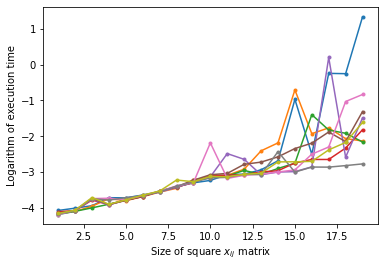

In [16]:
plt.figure()
for time in times:
    plt.plot(list(time.keys()), np.log(list(time.values())), '.-')
plt.xlabel("Size of square $x_{ij}$ matrix")
plt.ylabel("Logarithm of execution time")
plt.show()

The previous Figure shows that the logarithm of the execution time scales linearly with the size of the $x_{ij}$ matrix. Therefore, as the size scales as $n^2$,
$$ t \sim e^{-n^2}. $$
Coefficients can be obtained from linear regression, but they are not meaningful because time measurements depend heavily on open and background processes of the computer and vary notably between computers. Furthermore, nor heteroskedasticity (variation of data depends on $n$) nor normality (slightly skewed distribution towards higher times) are satisfied, thus statistical inference becomes non-trivial. The main insight is the empirical observation of exponential time dependence on the size of the problem. 

## g) Binary Model Dependence on Number of Trackers

An interesting parameter to analyze is the dependence on the available number of trackers. It is expected that the number of detected cases increases as the number of trackers increases, but the exact dependence can be nonlinear.

The number of trackers depends on the constant $f$, the fraction of recommended trackers by health authorities, which is $1/5500$. An increase of this constant produces an increase of the total number of trackers. Therefore, analyze the dependence of the objective function on the constant $f$ it is equivalent to analyze the detected cases as a function on the number of trackers.

A set of values for $f$ has been generated, ranging from $0.1 \cdot \frac{1}{5500}$ to $1.35 \cdot \frac{1}{5500}$ in steps of $0.5$ units. Some values that had a considerable execution time has not been considered. The same seed has been used for all values of $f$, which was the same as in b), thus the same data has been used except for the number of trackers.

In [17]:
# Copy dicts to modify them safely.
regionsT = copy.deepcopy(regions)
paramsT = copy.deepcopy(params)

# Generate new fraction_trackers.
my_iterator = np.arange(2, 14, 0.5).tolist()
fraction_trackers = [0.1*i/5500 for i in my_iterator]
fraction_trackers.remove(0.1*8/5500) # Remove time-consuming values.
fraction_trackers.remove(0.1*8.5/5500)
fraction_trackers.remove(0.1*11/5500)
fraction_trackers.remove(0.1*12.5/5500)

In [18]:
# NOTE: this cell takes some minutes to execute.

filename = "trackersT_data.dat"
obj_func_vals = {}

for fraction in fraction_trackers:
    np.random.seed(1234)
    paramsT["fraction_trackers"] = fraction
    
    # Create new dfs
    regions_cols = ["name", "population", "min_trackers", "budget", "incidence"]
    r_df_T = pd.DataFrame(columns = regions_cols, index = regionsT["region_names"])
    companies_cols = ["ID", "region", "n_trackers", "salary", "max_group"]
    c_df_T = pd.DataFrame(columns = companies_cols)
    w_df_T = pd.DataFrame(columns = regionsT["region_names"], 
                                  index = list(range(paramsT["n_companies"])))
    get_random_data(regionsT, paramsT, r_df_T, c_df_T, w_df_T)
    create_file(filename, r_df_T, c_df_T, w_df_T)
        
    # Create and solve new model.
    modelT = pyo.AbstractModel()
    get_modelB(modelT)
    region_names = regionsT["region_names"]
    companies_ID = c_df_T["ID"]
    instanceT = solve_model(modelT, filename, region_names, companies_ID, verbose = False)
    obj_func_vals[fraction] = instanceT.OBJ()
    print("People/tracker\tObjective function")
    print(round(1/fraction), "\t\t", instanceT.OBJ())

People/tracker	Objective function
27500 		 333.397046848576
People/tracker	Objective function
22000 		 401.8576827443723
People/tracker	Objective function
18333 		 469.68469441160937
People/tracker	Objective function
15714 		 537.4584814748795
People/tracker	Objective function
13750 		 604.9584726746352
People/tracker	Objective function
12222 		 669.5241322934655
People/tracker	Objective function
11000 		 732.7629432718353
People/tracker	Objective function
10000 		 779.9583547248266
People/tracker	Objective function
9167 		 837.668148581712
People/tracker	Objective function
8462 		 893.8972549769587
People/tracker	Objective function
7857 		 945.4307327526071
People/tracker	Objective function
7333 		 973.529734017418
People/tracker	Objective function
6111 		 1060.6479166593529
People/tracker	Objective function
5789 		 1091.9385349419185
People/tracker	Objective function
5500 		 1103.868585689553
People/tracker	Objective function
5238 		 1115.2862314125425
People/tracker	Objective functi

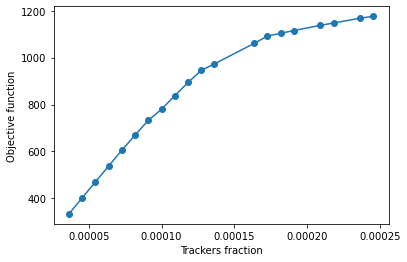

In [19]:
plt.figure()
plt.plot(obj_func_vals.keys(), obj_func_vals.values(), 'o-')
plt.xlabel("Trackers fraction")
plt.ylabel("Objective function")
plt.show()

From this Figure it can be observed that the objective function initially follows a linear trend, but then starts to saturate. The starting linear increase is intuitive: the more trackers, the higher the detection rate. For the saturation of the objective functions, there are at least two possible explanations:
- There are enough workers to track all positives. Thus the average number of positives detected per tracker, which we assumed constant, decreases. In economic terms, this is a case of high offer of trackers. Of course, if there were more than enough trackers salaries might decrease, but those considerations are out of the scope of the analysis.
- The total budget imposes a restriction on the number of trackers to be hired. Thus, very few of these new trackers actually work. In economic terms, this is a case of low demand of trackers, because regions are not willing to increase their expending.